<a href="https://colab.research.google.com/github/Vasudev-SN/MPEA_dataset/blob/master/SDP_28_TAYLOR's_TOOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

# CSV data file


In [21]:
data = pd.read_csv('Minitab_sdp_up.csv')

In [22]:
data

,StdOrder,RunOrder,PtType,Blocks,DOC (mm),feed (mm/rev),Speed (rpm),Stress,Defomation,Taylors Tool life
0,22,1,1,1,6,0.12,1520,6174.00,237.980,246.741
1,7,2,1,1,2,0.20,1520,3384.00,211.380,125.179
2,20,3,1,1,6,0.04,3040,1740.00,192.560,132.789
3,2,4,1,1,2,0.04,3040,1623.80,180.900,33.285
4,16,5,1,1,4,0.20,1520,261.20,72.200,219.235
5,15,6,1,1,4,0.12,4560,1490.00,142.400,283.229
6,6,7,1,1,2,0.12,4560,1288.39,136.181,71.651
7,1,8,1,1,2,0.04,1520,1540.00,55.900,19.123
8,24,9,1,1,6,0.12,4560,4149.00,227.090,182.455
9,3,10,1,1,2,0.04,4560,1522.50,174.810,45.864


#Drop non-necessary columns

In [23]:
data = data.iloc[:, 4:]

In [24]:
data

,DOC (mm),feed (mm/rev),Speed (rpm),Stress,Defomation,Taylors Tool life
0,6,0.12,1520,6174.00,237.980,246.741
1,2,0.20,1520,3384.00,211.380,125.179
2,6,0.04,3040,1740.00,192.560,132.789
3,2,0.04,3040,1623.80,180.900,33.285
4,4,0.20,1520,261.20,72.200,219.235
5,4,0.12,4560,1490.00,142.400,283.229
6,2,0.12,4560,1288.39,136.181,71.651
7,2,0.04,1520,1540.00,55.900,19.123
8,6,0.12,4560,4149.00,227.090,182.455
9,2,0.04,4560,1522.50,174.810,45.864


#Data Visualization

In [25]:
import matplotlib_inline
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='count'>

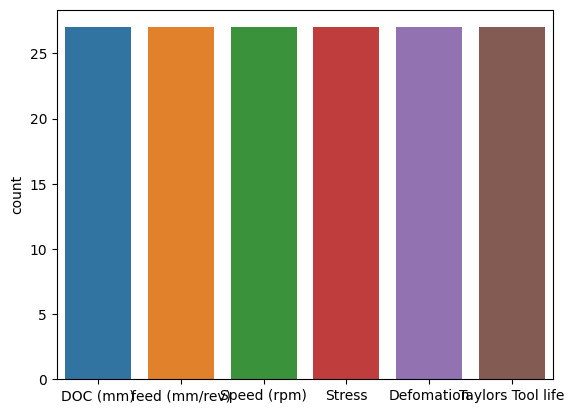

In [26]:
sns.countplot(data)

<Axes: >

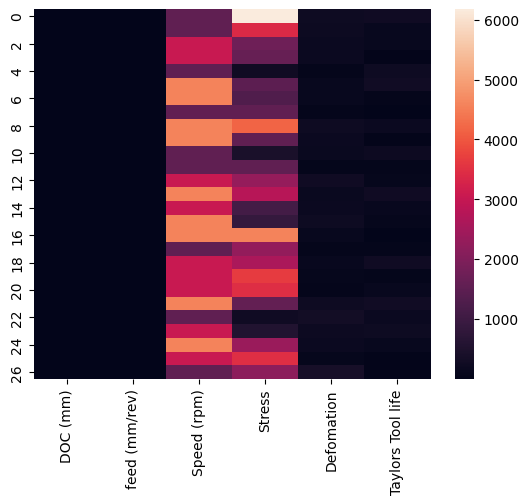

In [27]:
sns.heatmap(data)

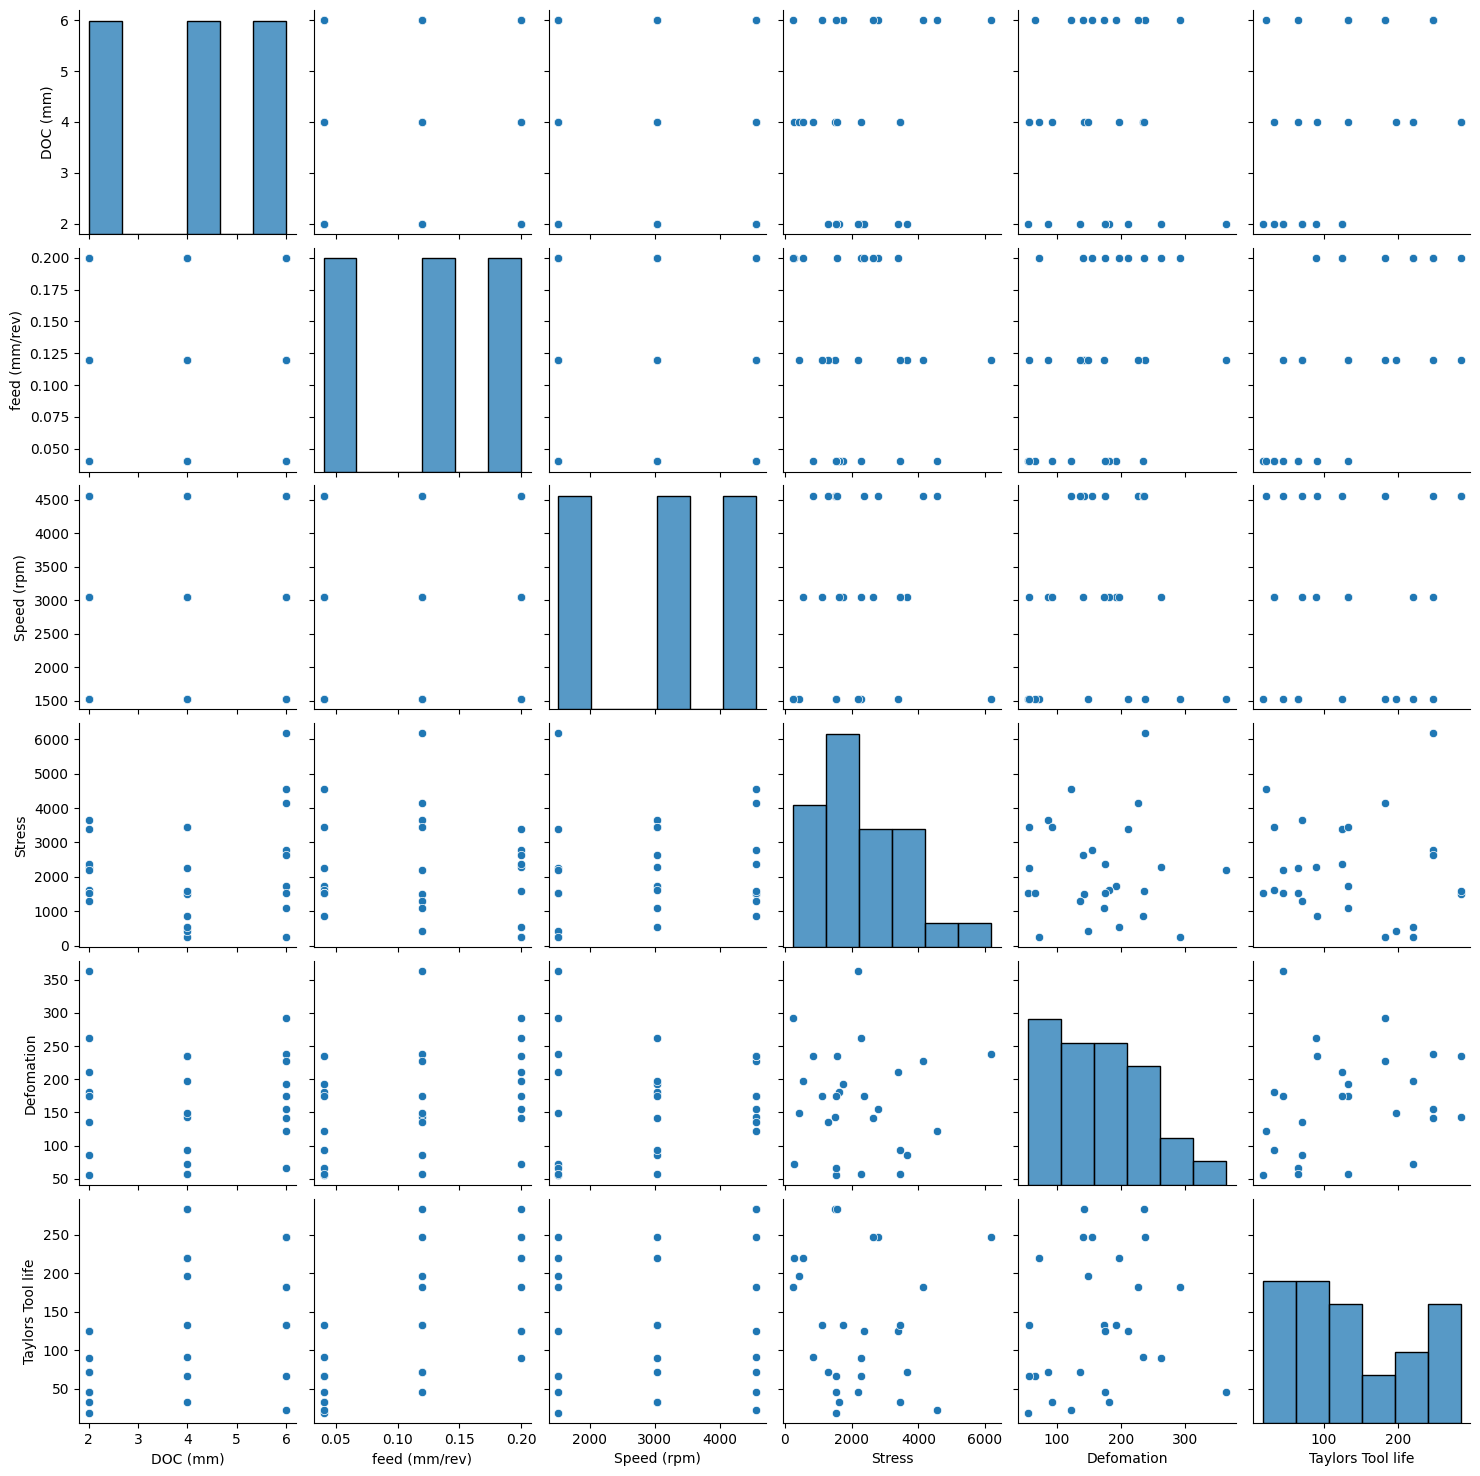

In [28]:
sns.pairplot(data)

In [29]:
import pandas as pd
import numpy as np


# Data Augmentation

In [30]:
augmented_data = pd.DataFrame()
for _ in range(10000):
    row = data.sample(1).iloc[0]
    row['DOC (mm)'] += np.random.uniform(-1, 1)
    row['feed (mm/rev)'] += np.random.uniform(-0.02, 0.02)
    row['Speed (rpm)'] += np.random.uniform(-100, 100)
    augmented_data = augmented_data.append(row, ignore_index=True)


<ipython-input-30-89d35a3b1ef5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row, ignore_index=True)



# Concatenate original and augmented data

In [31]:
augmented_data = pd.concat([data, augmented_data], ignore_index=True)

In [32]:
augmented_data

,DOC (mm),feed (mm/rev),Speed (rpm),Stress,Defomation,Taylors Tool life
0,6.000000,0.120000,1520.000000,6174.00,237.98,246.741
1,2.000000,0.200000,1520.000000,3384.00,211.38,125.179
2,6.000000,0.040000,3040.000000,1740.00,192.56,132.789
3,2.000000,0.040000,3040.000000,1623.80,180.90,33.285
4,4.000000,0.200000,1520.000000,261.20,72.20,219.235
...,...,...,...,...,...,...
10022,4.051921,0.181392,4633.452094,1573.80,235.18,283.229
10023,6.338994,0.103666,3033.748926,1102.10,174.31,132.789
10024,3.971231,0.218460,1448.615981,261.20,72.20,219.235
10025,4.456186,0.029581,4571.879412,853.01,234.73,91.327


<Axes: ylabel='count'>

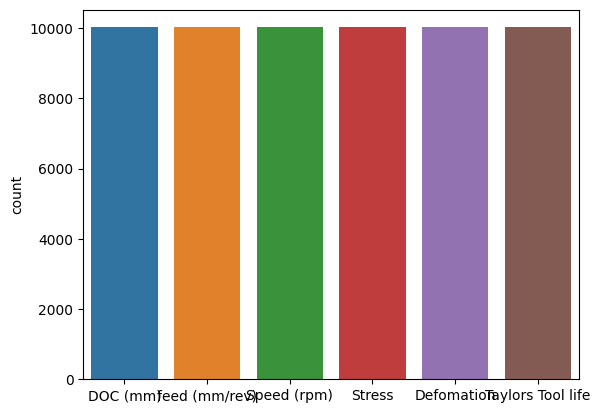

In [33]:
sns.countplot(augmented_data)

<Axes: >

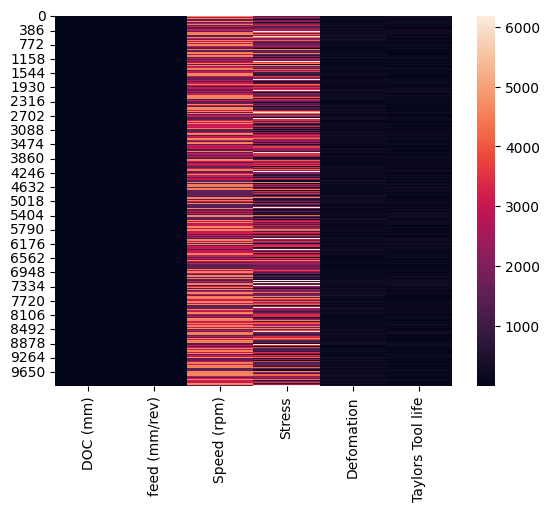

In [34]:
sns.heatmap(augmented_data)

#Correlation Heat-map

In [35]:
Correlation=augmented_data.corr()

<Axes: >

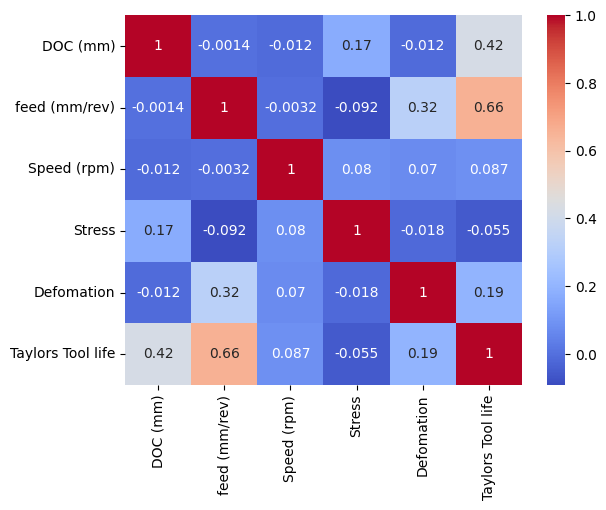

In [36]:
sns.heatmap(Correlation, cmap='coolwarm', annot=True)

#Box Plot

<Axes: >

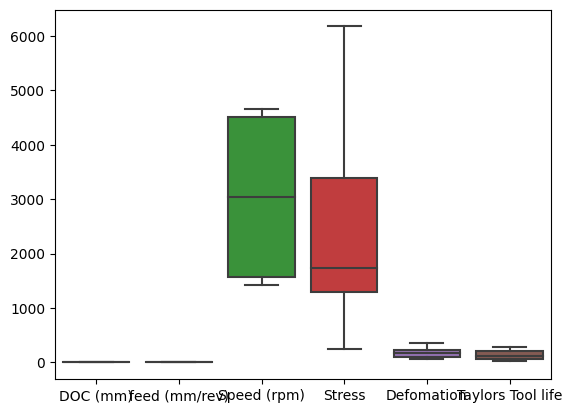

In [37]:
sns.boxplot(augmented_data)

# Separate features and target variables

In [40]:
X = augmented_data[['DOC (mm)', 'feed (mm/rev)', 'Speed (rpm)']]
y = augmented_data[['Taylors Tool life', 'Stress', 'Defomation']]

#Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler


In [42]:
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

In [43]:
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor


# Split the data into training and testing sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


# Regression model

In [46]:
model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)


# Train the model

In [47]:
model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)


# Evaluate the model

In [48]:
score = model.score(X_test, y_test)
print(f'Model R2 Score: {score:.2f}')

Model R2 Score: 0.89


# User input

In [49]:
user_doc = float(input("Enter DOC (mm): "))
user_feed = float(input("Enter feed (mm/rev): "))
user_speed = float(input("Enter Speed (rpm): "))

Enter DOC (mm): 6
Enter feed (mm/rev): 0.12
Enter Speed (rpm): 1520


In [50]:
user_input = np.array([[user_doc, user_feed, user_speed]])
user_input_scaled = scaler_X.transform(user_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [51]:
predicted_output_scaled = model.predict(user_input_scaled)
predicted_output = scaler_y.inverse_transform(predicted_output_scaled)

# Predict

In [52]:
print(f'Predicted Taylors tool life: {predicted_output[0, 0]:.2f}')
print(f'Predicted Stress: {predicted_output[0, 1]:.2f}')
print(f'Predicted Deformation: {predicted_output[0, 2]:.2f}')

Predicted Taylors tool life: 254.08
Predicted Stress: 5729.07
Predicted Deformation: 227.38


In [53]:
import matplotlib.pyplot as plt

In [54]:
y_pred = model.predict(X_test)

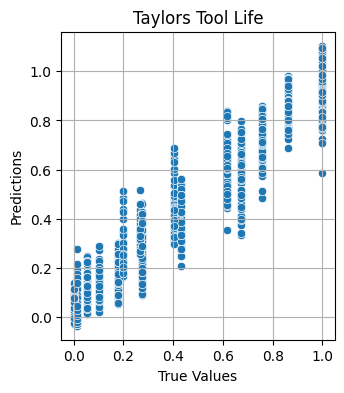

In [55]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test[:, 0], y=y_pred[:, 0])
plt.title('Taylors Tool Life')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)


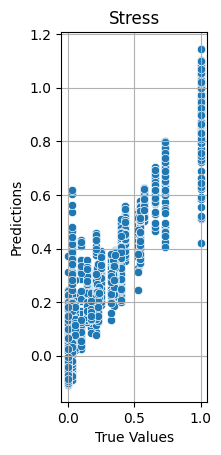

In [56]:
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test[:, 1], y=y_pred[:, 1])
plt.title('Stress')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)

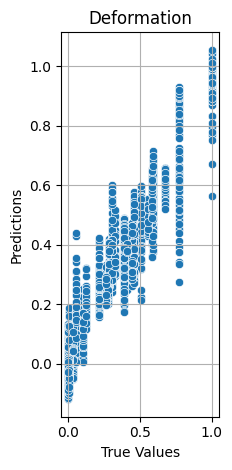

In [57]:
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test[:, 2], y=y_pred[:, 2])
plt.title('Deformation')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_taylors_tool_life = r2_score(y_test[:, 0], y_pred[:, 0])
r2_stress = r2_score(y_test[:, 1], y_pred[:, 1])
r2_deformation = r2_score(y_test[:, 2], y_pred[:, 2])

print(f'R-squared Taylors Tool Life: {r2_taylors_tool_life:.2f}')
print(f'R-squared Stress: {r2_stress:.2f}')
print(f'R-squared Deformation: {r2_deformation:.2f}')

R-squared Taylors Tool Life: 0.95
R-squared Stress: 0.84
R-squared Deformation: 0.89


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [61]:
y_pred = model.predict(X_test)
y_pred_unscaled = scaler_y.inverse_transform(y_pred)
y_test_unscaled = scaler_y.inverse_transform(y_test)

# Plotting Taylor's tool life

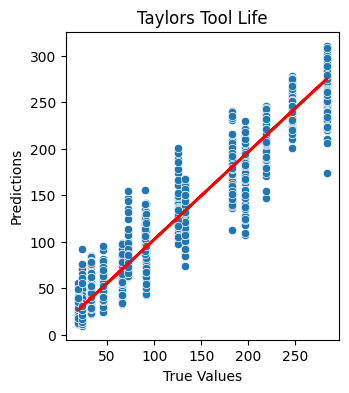

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test_unscaled[:, 0], y=y_pred_unscaled[:, 0])
plt.title('Taylors Tool Life')
plt.xlabel('True Values')
plt.ylabel('Predictions')
reg_line = LinearRegression().fit(y_test_unscaled[:, 0].reshape(-1, 1), y_pred_unscaled[:, 0])
plt.plot(y_test_unscaled[:, 0], reg_line.predict(y_test_unscaled[:, 0].reshape(-1, 1)), color='red', linewidth=2)

# Plotting Stress

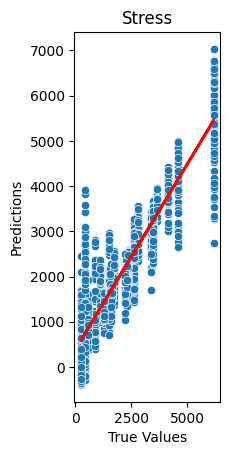

In [63]:
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test_unscaled[:, 1], y=y_pred_unscaled[:, 1])
plt.title('Stress')
plt.xlabel('True Values')
plt.ylabel('Predictions')
reg_line = LinearRegression().fit(y_test_unscaled[:, 1].reshape(-1, 1), y_pred_unscaled[:, 1])
plt.plot(y_test_unscaled[:, 1], reg_line.predict(y_test_unscaled[:, 1].reshape(-1, 1)), color='red', linewidth=2)

# Plotting Deformation

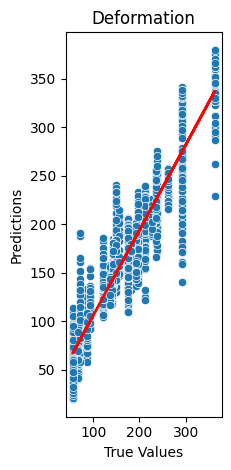

In [64]:
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test_unscaled[:, 2], y=y_pred_unscaled[:, 2])
plt.title('Deformation')
plt.xlabel('True Values')
plt.ylabel('Predictions')
reg_line = LinearRegression().fit(y_test_unscaled[:, 2].reshape(-1, 1), y_pred_unscaled[:, 2])
plt.plot(y_test_unscaled[:, 2], reg_line.predict(y_test_unscaled[:, 2].reshape(-1, 1)), color='red', linewidth=2)

plt.tight_layout()
plt.show()

###THANK-YOU ✔️